In [10]:
import numpy as np

from utils.vis_utils import *

from libs.body import Body
from libs.constants import *

from copy import deepcopy
import pandas as pd

In [2]:
def initialise_stars(configs, weights, G=1):
    # https://observablehq.com/@rreusser/periodic-planar-three-body-orbits
    stars = {}
    num_stars = len(weights)
    for i in range(num_stars):
        idx = 4 * i
        position = [configs[idx], configs[idx + 1]]
        velocity = [configs[idx + 2], configs[idx + 3]]
        weight = weights[i]
        star = Body(weight, np.array(position), np.array(velocity), f'star_{i}')
        star.G = G
        stars[f'star_{i}'] = star
    return stars

In [3]:
configs = {
    'broucke a3': {
        'configs': [
            0.3149337497,
            0,
            0,
            1.4601869417,
            0.812382071,
            0,
            0,
            -0.5628292375,
            -1.1273158206,
            0,
            0,
            -0.8973577042,
        ],
        'weights': [1, 1, 1],
        'G': 1,
    },
    'broucke a12': {
        'configs': [
            -0.337076702,
            0,
            0,
            0.9174260238,
            2.1164029743,
            0,
            0,
            -0.0922665014,
            -1.7793262723,
            0,
            0,
            -0.8251595224,
        ],
        'weights': [1, 1, 1],
        'G': 1,
    },
    'butterfly i2a': {
        'configs': [
            -1,
            0,
            0.080584,
            0.588836,
            1,
            0,
            0.080584,
            0.588836,
            0,
            0,
            -0.161168,
            -1.177672,
        ],
        'weights': [1, 1, 1],
        'G': 1,
    },
}

In [4]:
stars = initialise_stars(**configs['broucke a12'])
stars

{'star_0': BODY:star_0(mass=1.0, position=[-0.3370767  0.       ], velocity=[0.         0.91742602]),
 'star_1': BODY:star_1(mass=1.0, position=[2.11640297 0.        ], velocity=[ 0.        -0.0922665]),
 'star_2': BODY:star_2(mass=1.0, position=[-1.77932627  0.        ], velocity=[ 0.         -0.82515952])}

In [5]:
DELTA_T = 1e-4
NUM_STEPS = 5e5

In [6]:
for star in stars.values():
    print(star.update(list(stars.values()), DELTA_T))

BODY:star_0(mass=1.0, position=[-3.37076705e-01  9.17426024e-05], velocity=[-3.14624828e-05  9.17426024e-01])
BODY:star_1(mass=1.0, position=[ 2.11640297e+00 -9.22665014e-06], velocity=[-2.32015478e-05 -9.22665014e-02])
BODY:star_2(mass=1.0, position=[-1.77932627e+00 -8.25159522e-05], velocity=[ 5.46640306e-05 -8.25159522e-01])


# Calculate positions


In [7]:
star_positions = {}
for k, v in stars.items():
    star_positions[k] = [v.position]

for i in range(0, int(NUM_STEPS)):

    backup_stars = deepcopy(stars)

    for k, star in stars.items():
        other_stars = [other for k, other in backup_stars.items()]
        updated_star = star.update(other_stars, DELTA_T)
        stars[k] = updated_star
        star_positions[k].append(updated_star.position)

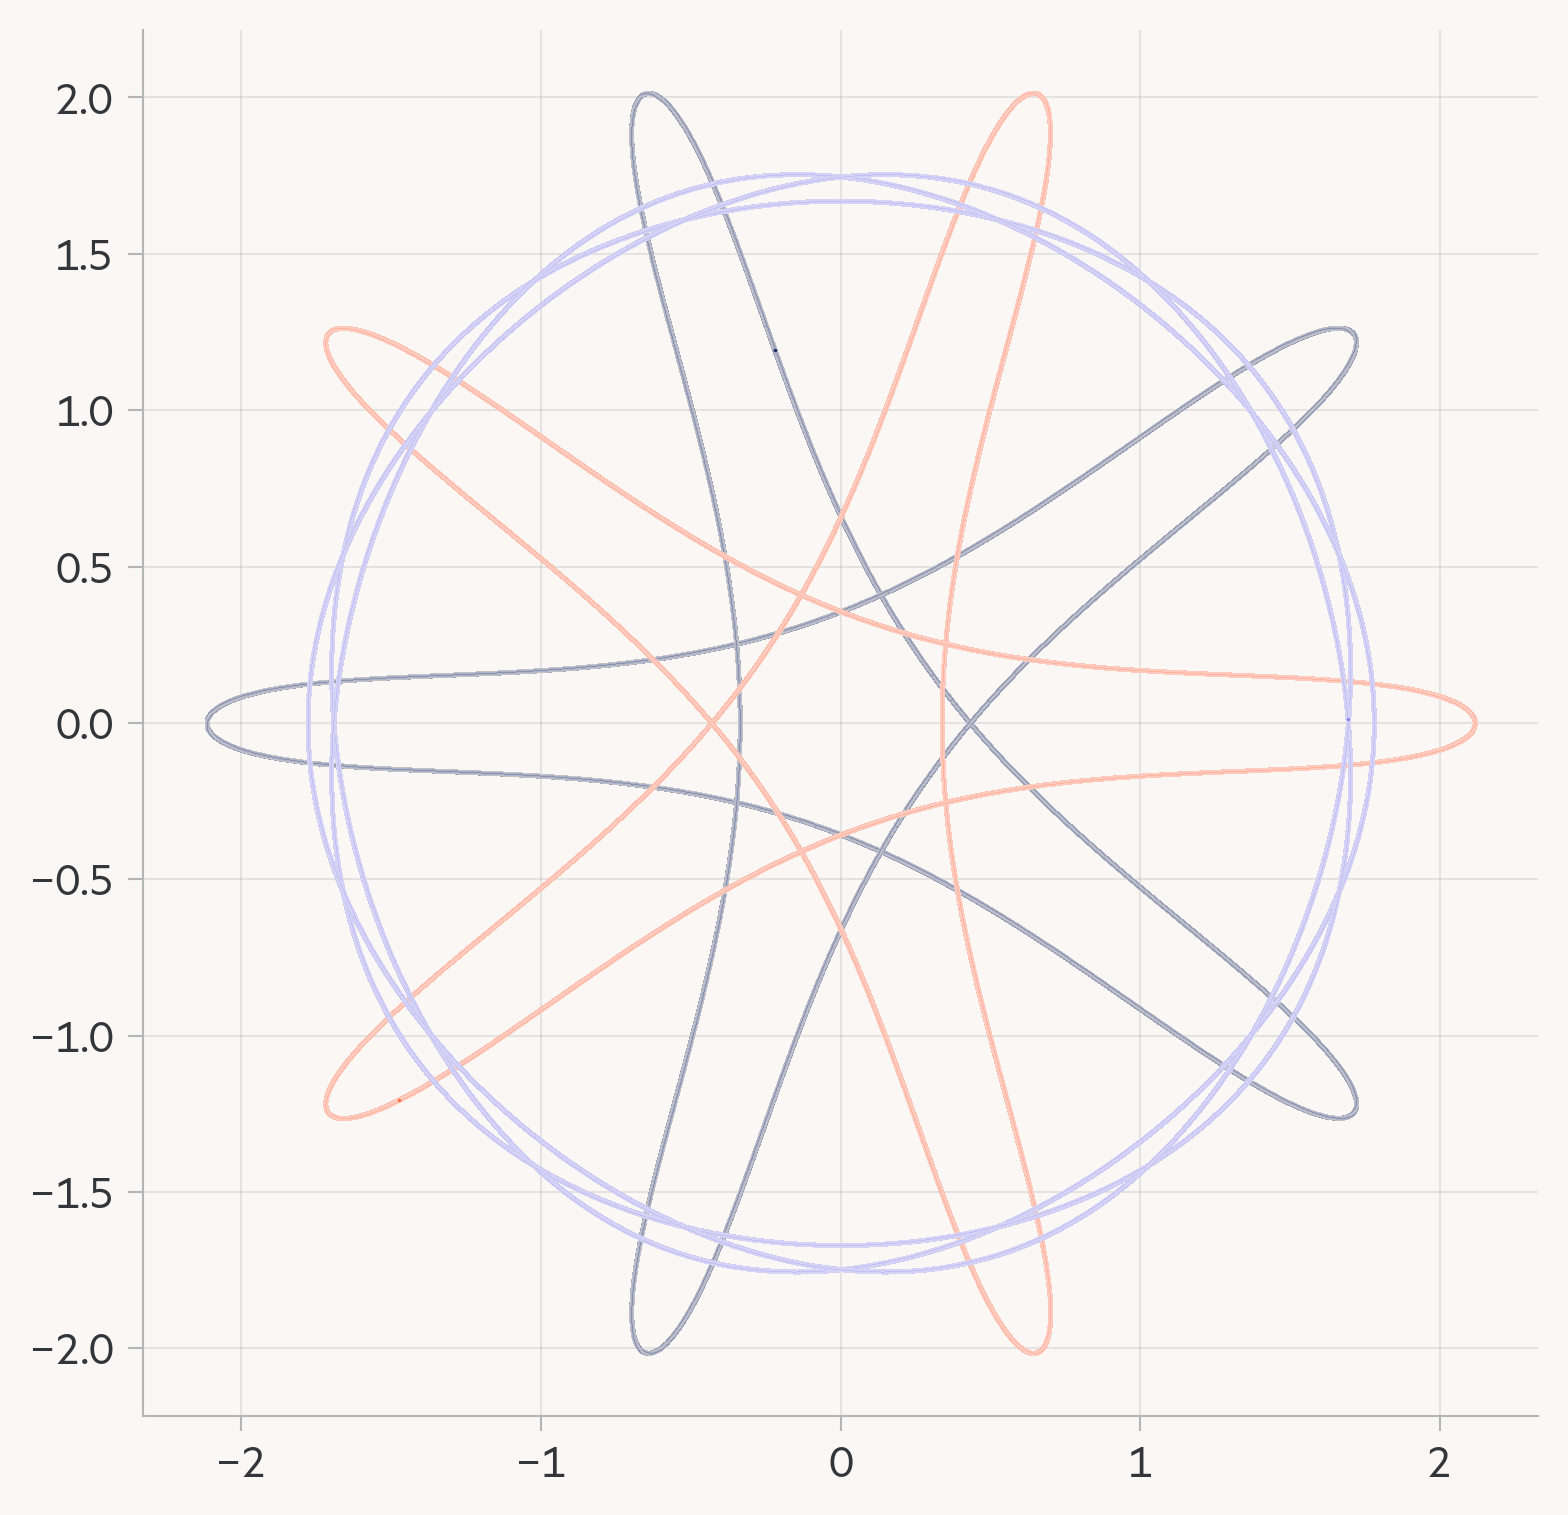

In [8]:
markers = ['o', 'X', 's', 'v', 'd', '^', '<', '>', 'p', 'h']

fig = plt.figure(figsize=(6, 6))

for idx, (k, v) in enumerate(star_positions.items()):
    positions = np.array(v)
    sns.scatterplot(x=positions[:, 0], y=positions[:, 1], s=1)

In [15]:
dfs = []
for k, v in star_positions.items():
    df = pd.DataFrame(v, columns=['x', 'y'])
    df['star'] = k
    dfs.append(df)

df = pd.concat(dfs).reset_index(drop=True)

In [16]:
df

,x,y,star
0,-0.337077,0.000000,star_0
1,-0.337077,0.000092,star_0
2,-0.337077,0.000183,star_0
3,-0.337077,0.000275,star_0
4,-0.337077,0.000367,star_0
...,...,...,...
1499998,1.694000,0.012010,star_2
1499999,1.694006,0.012083,star_2
1500000,1.694011,0.012156,star_2
1500001,1.694017,0.012229,star_2
